In [ ]:
# Import required libraries and QuantAnalysis class
import sys
sys.path.append('../src')
from quantitative_analysis_fn import QuantAnalysis
import pandas as pd



1. Load and Prepare Stock Price Data
load historical stock price data for a selected ticker (e.g., AAPL) and ensure it contains the required columns: Open, High, Low, Close, and Volume.

In [ ]:
# Load stock price data for AAPL

df = QuantAnalysis.load_stock_data('../data/yfinance_data/AAPL_historical_data.csv')
df.head()

2. Calculate Technical Indicators
use TA-Lib to calculate the 20-day Simple Moving Average (SMA), 14-day Relative Strength Index (RSI), and MACD (Moving Average Convergence Divergence).

In [ ]:
# Calculate technical indicators

df = QuantAnalysis.calculate_technical_indicators(df)
df[['Close', 'SMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].tail()

3. Fetch Financial Metrics with PyNance
You can use PyNance to fetch additional financial metrics for deeper analysis.

In [ ]:
# Example: Fetch historical data using PyNance (requires internet access)
metrics = QuantAnalysis.get_pynance_metrics('AAPL', '2023-01-01', '2023-12-31')
if metrics is not None:
    print(metrics.head())
else:
    print("Failed to fetch data")



4. Visualize Technical Indicators
visualize the Close price, SMA, RSI, and MACD to better understand the stock's price action and indicator signals.

In [ ]:
# Visualize technical indicators

QuantAnalysis.plot_technical_indicators(df, ticker='AAPL')

---
**References:**
- [TA-Lib Documentation](https://mrjbq7.github.io/ta-lib/)
- [PyNance Documentation](https://pynance.readthedocs.io/en/latest/)
- [Pandas Documentation](https://pandas.pydata.org/)
- https://www.kaggle.com/code/mmmarchetti/tutorial-python-for-finance
- https://www.youtube.com/watch?v=5cZJPvEYRbA


News file exists: True
Stock file exists: True
News data sample:
         date                                           headline
0  2020-05-06            Stocks That Hit 52-Week Highs On Friday
1  2020-03-06         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...

Stock data sample:
         date     Close
0  1980-12-12  0.128348
1  1980-12-15  0.121652
2  1980-12-16  0.112723
3  1980-12-17  0.115513
4  1980-12-18  0.118862
News data sample:
         date                                           headline
0  2020-05-06            Stocks That Hit 52-Week Highs On Friday
1  2020-03-06         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maint

News file exists: True
Stock file exists: True
News data sample:
         date                                           headline
0  2020-05-06            Stocks That Hit 52-Week Highs On Friday
1  2020-03-06         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...

Stock data sample:
         date     Close
0  1980-12-12  0.128348
1  1980-12-15  0.121652
2  1980-12-16  0.112723
3  1980-12-17  0.115513
4  1980-12-18  0.118862
News data sample:
         date                                           headline
0  2020-05-06            Stocks That Hit 52-Week Highs On Friday
1  2020-03-06         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maint

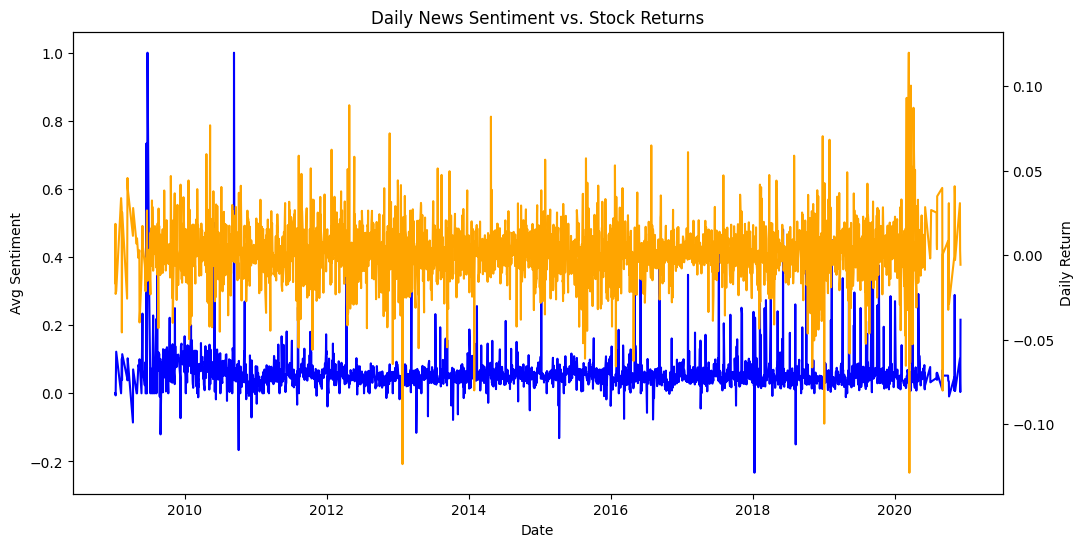

In [1]:
# Task 3: Correlation between News Sentiment and Stock Movement

# 1. Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates.
import sys
sys.path.append('../src')
from quantitative_analysis_fn import NewsSentimentCorrelation
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load and align data
news_df, stock_df = NewsSentimentCorrelation.load_and_align_data(
    '../data/raw/raw_analyst_ratings.csv',
    '../data/yfinance_data/AAPL_historical_data.csv'
)

# 2. Sentiment Analysis: Conduct sentiment analysis on news headlines to quantify the tone of each article.
news_df = NewsSentimentCorrelation.compute_sentiment(news_df)

# 3. Analysis: Calculate Daily Stock Returns
# Compute the percentage change in daily closing prices to represent stock movements.
daily_returns = NewsSentimentCorrelation.compute_daily_returns(stock_df)

# 4. Analysis: Aggregate daily sentiment scores
daily_sentiment = NewsSentimentCorrelation.aggregate_daily_sentiment(news_df)

# 5. Correlation Analysis: Use statistical methods to test the correlation between daily news sentiment scores and stock returns.
merged, correlation = NewsSentimentCorrelation.merge_and_correlate(daily_sentiment, daily_returns)
print(f"Pearson correlation between average daily sentiment and daily stock returns: {correlation:.3f}")

# Optional: Visualize the relationship

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged['date'], merged['avg_sentiment'], label='Avg Sentiment', color='blue')
ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['daily_return'], label='Daily Return', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Sentiment')
ax2.set_ylabel('Daily Return')
plt.title('Daily News Sentiment vs. Stock Returns')
plt.show()